In [25]:
#데이터 준비하기 
import pandas as pd

train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")

ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")

In [26]:
print(train_data.columns)

Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


Viscra 내장
Shucked Weight  the weight without the shell
Shell Weight 껍질 무게


제거할 번호 465, 762, 47, 382, 435, 1078

In [27]:
train_data[train_data['Viscra Weight']>train_data['Shucked Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,466,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [28]:
train_data[(train_data['Shell Weight']+train_data['Shucked Weight'])>train_data['Whole Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,383,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,436,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,848,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,1079,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [29]:
train_data[train_data['Shucked Weight']>train_data['Whole Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
435,436,I,0.475,0.365,0.10,0.1315,0.2025,0.0875,0.1230,7
1078,1079,I,0.275,0.205,0.07,0.1055,0.4950,0.0190,0.0315,5


In [30]:
print(train_data.shape)
train_data.drop(index=762,axis =0,inplace= True)
train_data.drop(index=465,axis =0,inplace= True)
train_data.drop(index=47,axis =0,inplace= True)
train_data.drop(index=382,axis =0,inplace= True)
train_data.drop(index=435,axis =0,inplace= True)
train_data.drop(index=1078,axis =0,inplace= True)
#만약 제거 하기 싫으면 이거 지우면댐

(1253, 10)


In [31]:
print(train_data.shape)

(1247, 10)


In [32]:
#water = 전체무게 -(껍질무게+껍질을 제외한 무게) 보다 ratio=껍질을 제외한 무게/전체 무게 
water_train = train_data['Whole Weight'] -train_data['Shucked Weight']
water_ques = ques_data['Whole Weight'] -ques_data['Shucked Weight']

In [33]:
#train_data['Water'] = water_train
#ques_data['Water'] = water_ques

In [34]:
Ratio_train =  train_data['Shucked Weight']/train_data['Whole Weight'] 
Ratio_ques =  ques_data['Shucked Weight']/ques_data['Whole Weight'] 
train_data['Ratio'] = Ratio_train
ques_data['Ratio'] = Ratio_ques
print(train_data.head())
ques_data.head()

   id Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      M   0.605     0.470   0.115        1.1140          0.3925   
1   2      I   0.430     0.315   0.095        0.3780          0.1750   
2   3      I   0.580     0.490   0.195        1.3165          0.5305   
3   4      M   0.535     0.405   0.175        1.2705          0.5480   
4   5      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target     Ratio  
0         0.2910        0.3100      15  0.352334  
1         0.0800        0.1045       8  0.462963  
2         0.2540        0.4100      18  0.402962  
3         0.3265        0.3370      13  0.431326  
4         0.0310        0.0400       6  0.377953  


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Ratio
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0.402765
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0.297735
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0.427835
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0.412886
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0.464960


In [35]:
train_target = train_data['Target']
print(train_data.shape,ques_data.shape,train_target.shape)
train_data.drop(['id', 'Target'], axis=1,inplace=True)
ques_data.drop(['id'], axis=1,inplace=True)
train_data = pd.get_dummies(train_data)
ques_data = pd.get_dummies(ques_data)

print(train_data.shape,ques_data.shape,train_target.shape)

(1247, 11) (2924, 10) (1247,)
(1247, 11) (2924, 11) (1247,)


In [36]:
train_max_input = train_data.to_numpy()
train_max_target = train_target.to_numpy()
ques_input = ques_data.to_numpy()

In [37]:
#특성공학으로도 늘려보기

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_max_input)
train_max_scaled = ss.transform(train_max_input)
ques_scaled =ss.transform(ques_input)

In [39]:
from sklearn.model_selection import train_test_split
train_scaled, test_scaled, train_target, test_target = train_test_split(train_max_scaled,train_max_target,test_size=0.2)

In [40]:
print(train_max_scaled.shape)
print(train_scaled.shape)
print(test_scaled.shape)

(1247, 11)
(997, 11)
(250, 11)


In [41]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(16,activation='elu', input_dim=11))
model.add(keras.layers.Dense(32,activation='elu'))
model.add(keras.layers.Dense(64,activation='elu'))
model.add(keras.layers.Dropout(0.35))
model.add(keras.layers.Dense(32,activation='elu'))
model.add(keras.layers.Dense(16,activation='elu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [42]:
##loss: 'mean_absolute_error'
##optimizer 따로 함수 만들어서 다른것도 만들어보기
#nadam = keras.optimizers.Nadam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#model.compile(loss ='mean_absolute_error',optimizer = nadam)
#checkpoint_cb = keras.callbacks.ModelCheckpoint('딥러닝_1(model)', save_best_only=True)
#early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True)


In [43]:
#history = model.fit(train_scaled,train_target,validation_split=0.2,epochs=1000,callbacks=[checkpoint_cb,early_stopping_cb])
#print(early_stopping_cb.stopped_epoch)
#
#print(history.history['loss'][early_stopping_cb.stopped_epoch-100],history.history['val_loss'][early_stopping_cb.stopped_epoch-100])

In [44]:
Tloss =[]
Vloss=[]
for i in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
    nadam = keras.optimizers.Nadam(learning_rate=i, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    model.compile(loss ='mean_absolute_error',optimizer = nadam)
    checkpoint_cb = keras.callbacks.ModelCheckpoint('딥러닝_1(model)', save_best_only=True)
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True)
    history = model.fit(train_scaled,train_target,validation_split=0.2,epochs=1000,callbacks=[checkpoint_cb,early_stopping_cb],verbose=0)
    #print(i, early_stopping_cb.stopped_epoch)
    #print(history.history['loss'][early_stopping_cb.stopped_epoch-100],history.history['val_loss'][early_stopping_cb.stopped_epoch-100])
    #print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
    Tloss.append(history.history['loss'][early_stopping_cb.stopped_epoch-100])
    Vloss.append(history.history['val_loss'][early_stopping_cb.stopped_epoch-100])
    print(Tloss)
    print(Vloss)
print(Tloss)
print(Vloss)


INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tensorflow:Assets written to: 딥러닝_1(model)\assets
INFO:tenso

In [45]:
#[1.4600863456726074, 1.4148648977279663, 1.3546310663223267, 1.409367561340332, 1.4308050870895386, 1.8517320156097412, 2.1149449348449707]
#[1.4666786193847656, 1.4535043239593506, 1.4496450424194336, 1.4520829916000366, 1.456810474395752, 1.6800751686096191, 1.895699143409729]

#[1.408519983291626, 1.3495877981185913, 1.3416342735290527, 1.3801909685134888, 1.3952325582504272, 1.7139472961425781, 2.3904550075531006]
#[1.4371708631515503, 1.4092724323272705, 1.3918246030807495, 1.3974816799163818, 1.4379794597625732, 1.5726962089538574, 2.2705795764923096]

#조절

#[1.3865793943405151, 1.3409525156021118, 1.3390586376190186, 1.3946274518966675, 1.4808623790740967, 1.605684757232666, 2.0091190338134766]
#[1.4787187576293945, 1.4454946517944336, 1.4507060050964355, 1.429193139076233, 1.4541733264923096, 1.4645981788635254, 1.978052020072937]

#[1.4529577493667603, 1.4110784530639648, 1.420938491821289, 1.4189287424087524, 1.4431909322738647, 1.7848201990127563, 2.0536625385284424]
#[1.6292908191680908, 1.6169853210449219, 1.6091166734695435, 1.5925902128219604, 1.5872585773468018, 1.760848879814148, 1.8432377576828003]

#[1.4341628551483154, 1.4176089763641357, 1.3556270599365234, 1.4250555038452148, 1.3743952512741089, 1.5431389808654785, 2.1409754753112793]
#[1.6323415040969849, 1.6178491115570068, 1.5975258350372314, 1.5876777172088623, 1.5893243551254272, 1.636724829673767, 2.062161684036255]

#[1.420170545578003, 1.4337217807769775, 1.4331305027008057, 1.423508882522583, 1.4331269264221191, 1.7302302122116089, 2.1392548084259033]
#[1.5625027418136597, 1.5440466403961182, 1.5366942882537842, 1.530248999595642, 1.5732096433639526, 1.7697349786758423, 1.9518115520477295]

#[1.431894302368164, 1.411698341369629, 1.3856260776519775, 1.4766654968261719, 1.472758412361145, 1.8509738445281982, 1.9101853370666504]
#[1.5972070693969727, 1.5727273225784302, 1.5610606670379639, 1.549170970916748, 1.5931892395019531, 1.7297505140304565, 2.0152974128723145]

#다시 돌아옴

#[1.4334548711776733, 1.4264150857925415, 1.4099724292755127, 1.4162695407867432, 1.4300003051757812, 1.6324716806411743, 2.7804388999938965]
#[1.4041675329208374, 1.3881340026855469, 1.3928946256637573, 1.4095633029937744, 1.407618522644043, 1.4772247076034546, 2.1163995265960693]

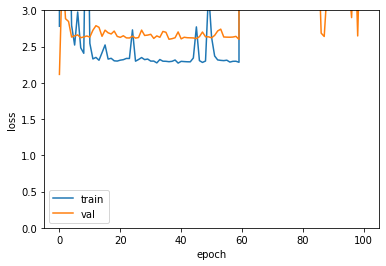

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0,3)
plt.legend(['train','val'])
plt.show()


In [47]:
ans = model.predict(ques_scaled)
print(type(ans))
print(ans.shape)
print(ans[:10])

<class 'numpy.ndarray'>
(2924, 1)
[[10.77976 ]
 [10.991627]
 [ 8.654543]
 [10.874971]
 [ 9.387098]
 [10.156012]
 [10.198027]
 [ 8.654543]
 [10.60446 ]
 [ 8.654543]]


In [48]:
#submission = pd.read_csv("E:\데이콘\전복나이 예측\데이터\sample_submission.csv")
#submission['Target'] = ans
#submission.to_csv("Submit_11(딥러닝3_mae).csv",index=False)